In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df_data = pd.read_csv("tv_shows.csv", index_col = 0)
df_data.head(5)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [3]:
df_data.isnull()
df_data = df_data.dropna()
df_data.head(5)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [4]:
df_data["IMDb"] = df_data["IMDb"].str.replace('/10','').astype(float)
df_data["Rotten Tomatoes"] = df_data["Rotten Tomatoes"].str.replace('/100','').astype(int)
df_data.head(5)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,Breaking Bad,2008,18+,9.4,100,1,0,0,0,1
1,2,Stranger Things,2016,16+,8.7,96,1,0,0,0,1
2,3,Attack on Titan,2013,18+,9.0,95,1,1,0,0,1
3,4,Better Call Saul,2015,18+,8.8,94,1,0,0,0,1
4,5,Dark,2017,16+,8.8,93,1,0,0,0,1


In [5]:
IMDb = df_data["IMDb"]
RT = df_data["Rotten Tomatoes"]
IMDb.corr(RT)
RT.corr(IMDb)

0.5170267156674199

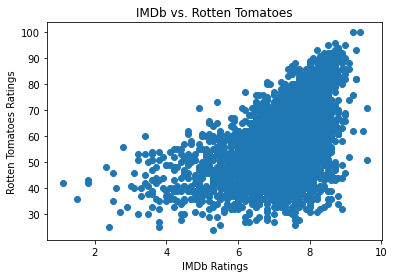

In [6]:
plt.scatter(IMDb, RT)
plt.title("IMDb vs. Rotten Tomatoes")
plt.xlabel("IMDb Ratings")
plt.ylabel("Rotten Tomatoes Ratings")
plt.show()

In [7]:
df_data = pd.read_csv("tv_shows.csv", index_col = 0)
df_data["Rotten Tomatoes"] = df_data["Rotten Tomatoes"].str.replace('/100','').astype(int)
df_data.head(5)


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,Breaking Bad,2008,18+,9.4/10,100,1,0,0,0,1
1,2,Stranger Things,2016,16+,8.7/10,96,1,0,0,0,1
2,3,Attack on Titan,2013,18+,9.0/10,95,1,1,0,0,1
3,4,Better Call Saul,2015,18+,8.8/10,94,1,0,0,0,1
4,5,Dark,2017,16+,8.8/10,93,1,0,0,0,1


In [8]:
df_data["Rotten Tomatoes"] = df_data["Rotten Tomatoes"].astype(float)
df_data["Netflix"] = df_data["Netflix"].astype(int)
df_netflix = df_data[["Rotten Tomatoes", "Netflix"]]
df_netflix = df_netflix.groupby(pd.cut(df_netflix["Rotten Tomatoes"], np.arange(0, 101, 10))).sum()


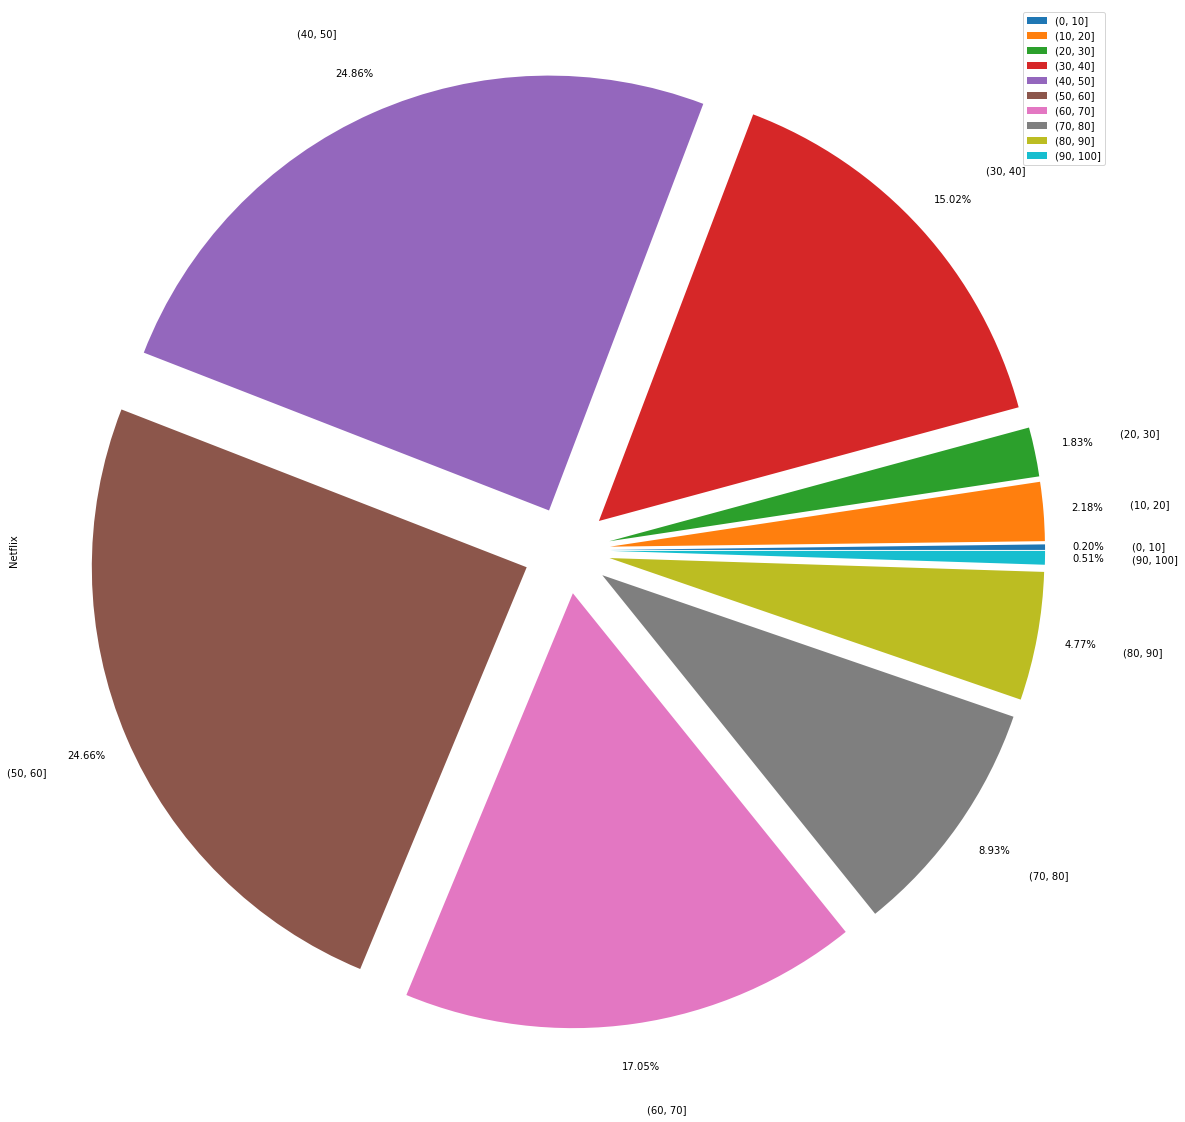

In [9]:

plot = df_netflix.plot.pie(y = "Netflix", figsize = (20,20), autopct='%1.2f%%', pctdistance=1.1, labeldistance=1.2, explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))




0.0003392723710291121


Ttest_indResult(statistic=2.8087584469996383, pvalue=0.0027650955564016964)

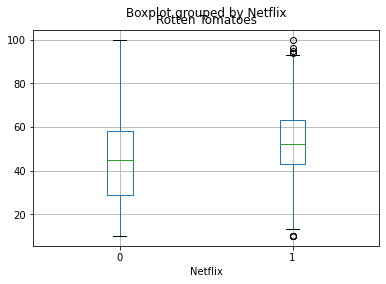

In [10]:
df_data.boxplot(column = "Rotten Tomatoes", by = "Netflix")

df_netflix = df_data[["Rotten Tomatoes", "Netflix"]]

netflix_yes = df_netflix[df_netflix["Netflix"] == 1]
netflix_no = df_netflix[df_netflix["Netflix"] == 0]

netflix_ysample = netflix_yes.sample(n = 100)
netflix_nsample = netflix_no.sample(n = 100)

var_test = stats.levene(netflix_ysample["Rotten Tomatoes"], 
                        netflix_nsample["Rotten Tomatoes"])
print(var_test.pvalue)

if var_test.pvalue >= 0.05:
    var = True
else:
    var = False

stats.ttest_ind(netflix_ysample["Rotten Tomatoes"], 
                netflix_nsample["Rotten Tomatoes"], 
                equal_var = var, alternative = "greater")



0.8175996614136788


Ttest_indResult(statistic=3.0391400221913174, pvalue=0.0013464059048363165)

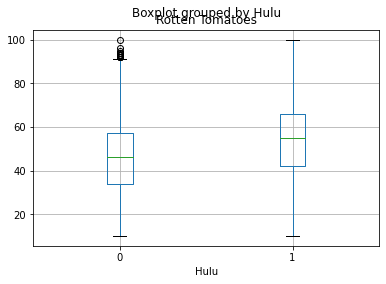

In [11]:
df_data.boxplot(column = "Rotten Tomatoes", by = "Hulu")

df_hulu = df_data[["Rotten Tomatoes", "Hulu"]]

hulu_yes = df_hulu[df_hulu["Hulu"] == 1]
hulu_no = df_hulu[df_hulu["Hulu"] == 0]

hulu_ysample = hulu_yes.sample(n = 100)
hulu_nsample = hulu_no.sample(n = 100)

var_test = stats.levene(hulu_ysample["Rotten Tomatoes"], hulu_nsample["Rotten Tomatoes"])
print(var_test.pvalue)

if var_test.pvalue >= 0.05:
    var = True
else:
    var = False

stats.ttest_ind(hulu_ysample["Rotten Tomatoes"], hulu_nsample["Rotten Tomatoes"], 
                equal_var = var, alternative = "greater")



0.08248579722458453


Ttest_indResult(statistic=-6.243219146268023, pvalue=1.280445327739012e-09)

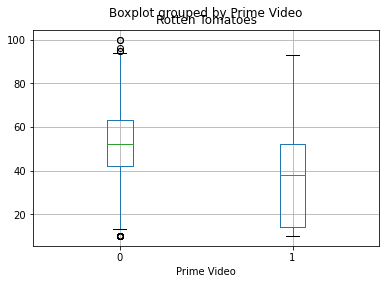

In [12]:
df_data.boxplot(column = "Rotten Tomatoes", by = "Prime Video")

df_pv = df_data[["Rotten Tomatoes", "Prime Video"]]

pv_yes = df_pv[df_pv["Prime Video"] == 1]
pv_no = df_pv[df_pv["Prime Video"] == 0]

pv_ysample = pv_yes.sample(n = 100)
pv_nsample = pv_no.sample(n = 100)

var_test = stats.levene(pv_ysample["Rotten Tomatoes"], pv_nsample["Rotten Tomatoes"])
print(var_test.pvalue)

if var_test.pvalue >= 0.05:
    var = True
else:
    var = False
    
stats.ttest_ind(pv_ysample["Rotten Tomatoes"], pv_nsample["Rotten Tomatoes"],
                equal_var = var, alternative = "less")



0.0006499571480023718


Ttest_indResult(statistic=2.1710398659802497, pvalue=0.015632447082093014)

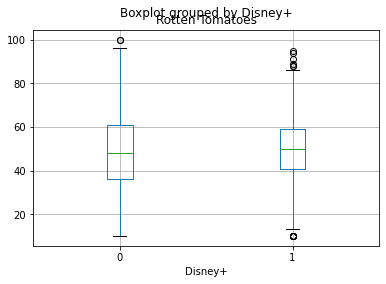

In [13]:
df_data.boxplot(column = "Rotten Tomatoes", by = "Disney+")

df_disney = df_data[["Rotten Tomatoes", "Disney+"]]

disney_yes = df_disney[df_disney["Disney+"] == 1]
disney_no = df_disney[df_disney["Disney+"] == 0]

disney_ysample = disney_yes.sample(n = 100)
disney_nsample = disney_no.sample(n = 100)

var_test = stats.levene(disney_ysample["Rotten Tomatoes"], disney_nsample["Rotten Tomatoes"])
print(var_test.pvalue)

if var_test.pvalue >= 0.05:
    var = True
else:
    var = False

stats.ttest_ind(disney_ysample["Rotten Tomatoes"], disney_nsample["Rotten Tomatoes"], 
                equal_var = var, alternative = "greater")




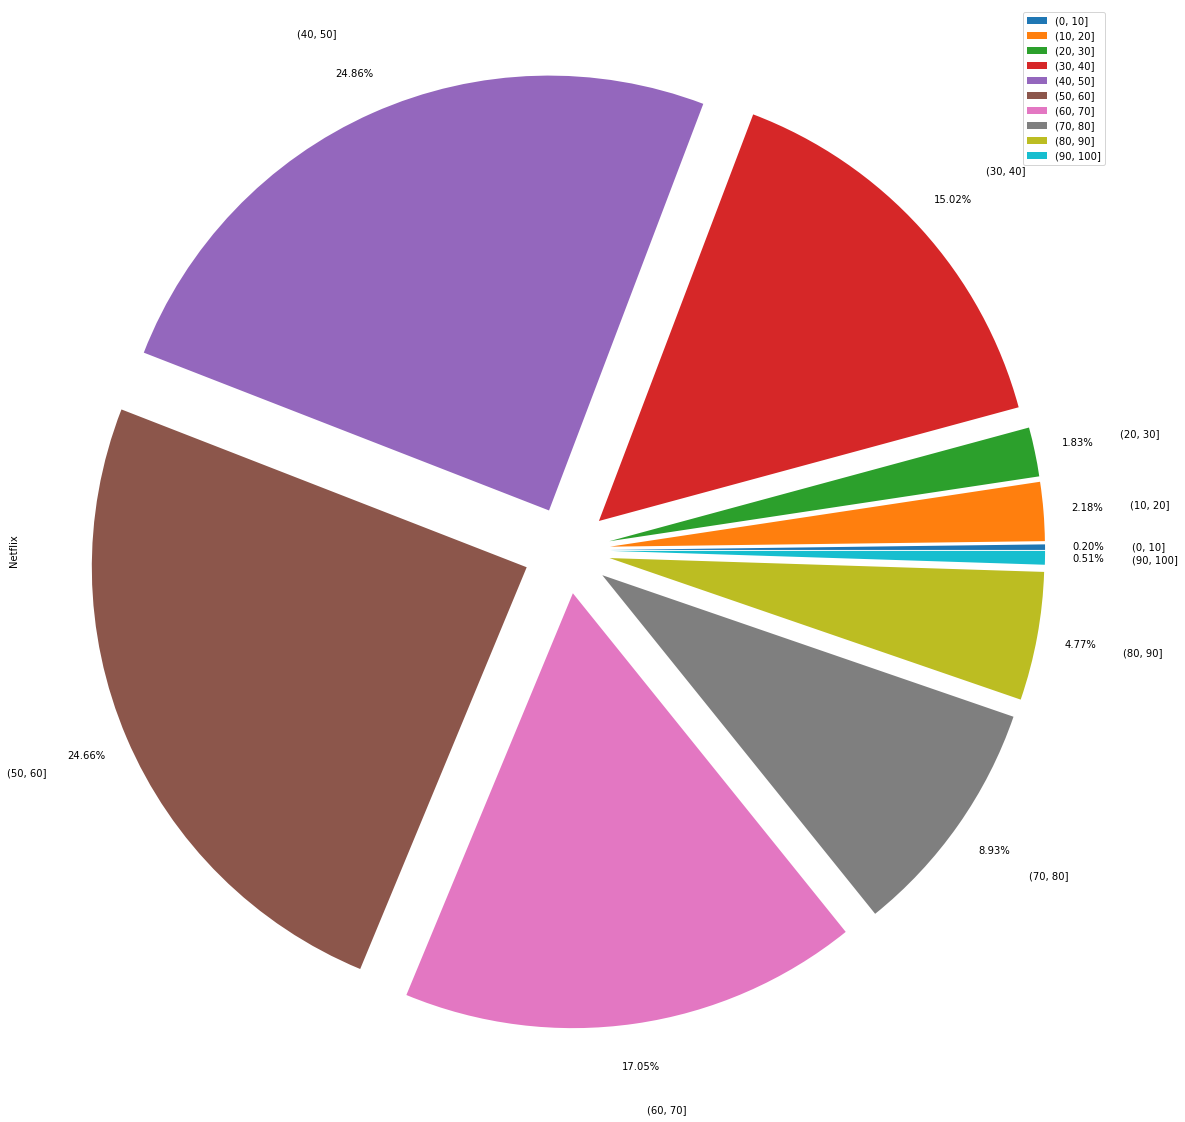

In [14]:
df_data["Rotten Tomatoes"] = df_data["Rotten Tomatoes"].astype(float)
df_data["Netflix"] = df_data["Netflix"].astype(int)
df_netflix = df_data[["Rotten Tomatoes", "Netflix"]]
df_netflix = df_netflix.groupby(pd.cut(df_netflix["Rotten Tomatoes"], np.arange(0, 101, 10))).sum()

plot = df_netflix.plot.pie(y = "Netflix", figsize = (20,20), autopct='%1.2f%%', pctdistance=1.1, labeldistance=1.2, explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))




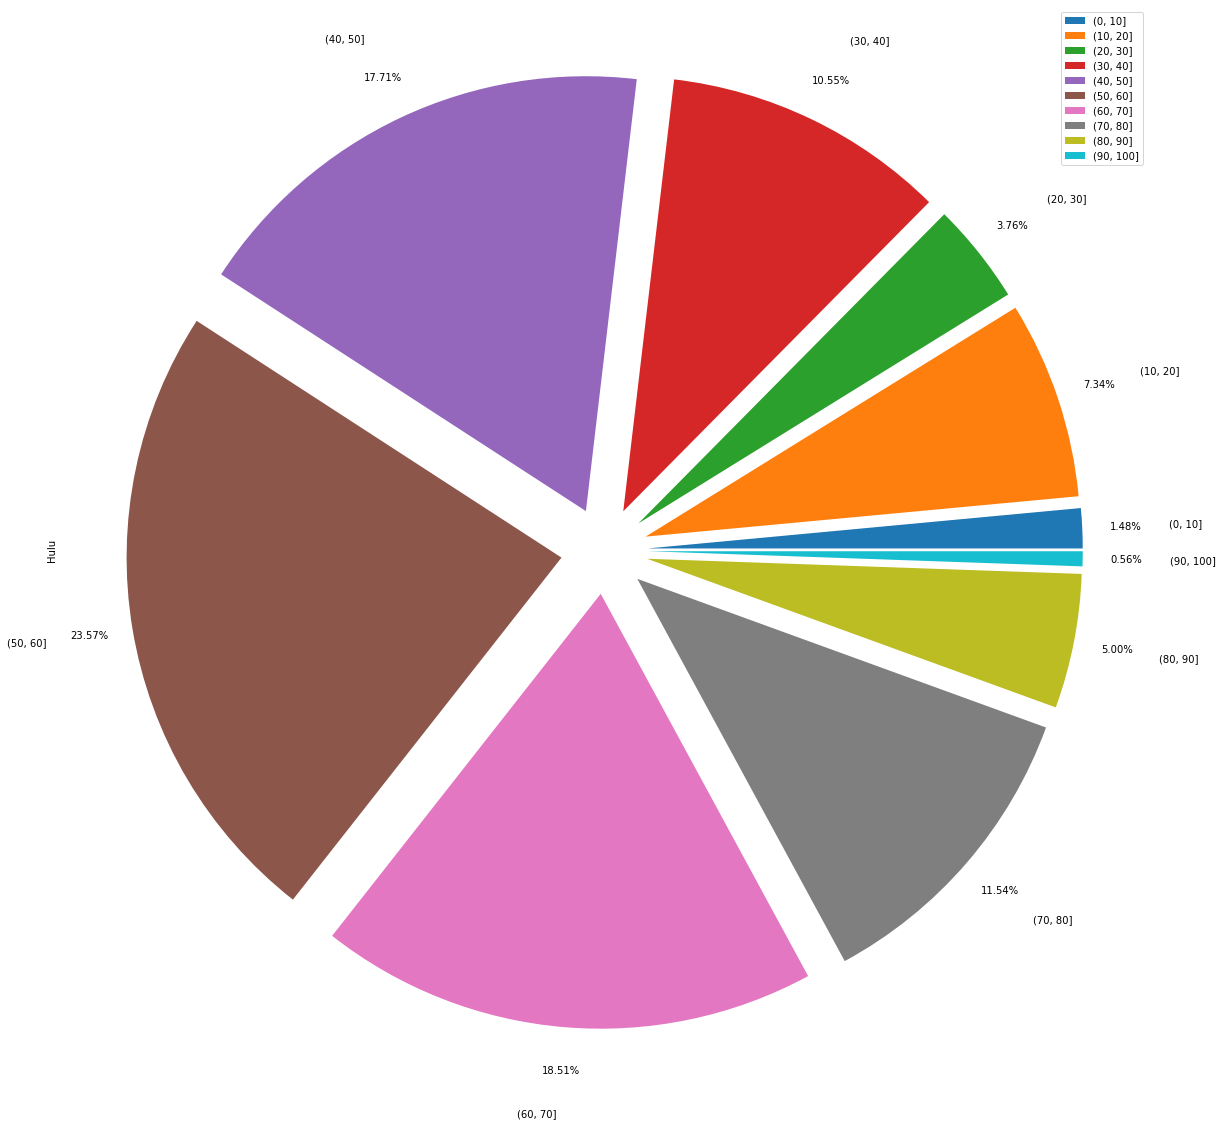

In [15]:
df_data["Rotten Tomatoes"] = df_data["Rotten Tomatoes"].astype(float)
df_data["Hulu"] = df_data["Hulu"].astype(int)
df_hulu = df_data[["Rotten Tomatoes", "Hulu"]]
df_hulu = df_hulu.groupby(pd.cut(df_hulu["Rotten Tomatoes"], np.arange(0, 101, 10))).sum()

plot = df_hulu.plot.pie(y = "Hulu", figsize = (20,20), autopct='%1.2f%%', pctdistance=1.1, labeldistance=1.2, explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))




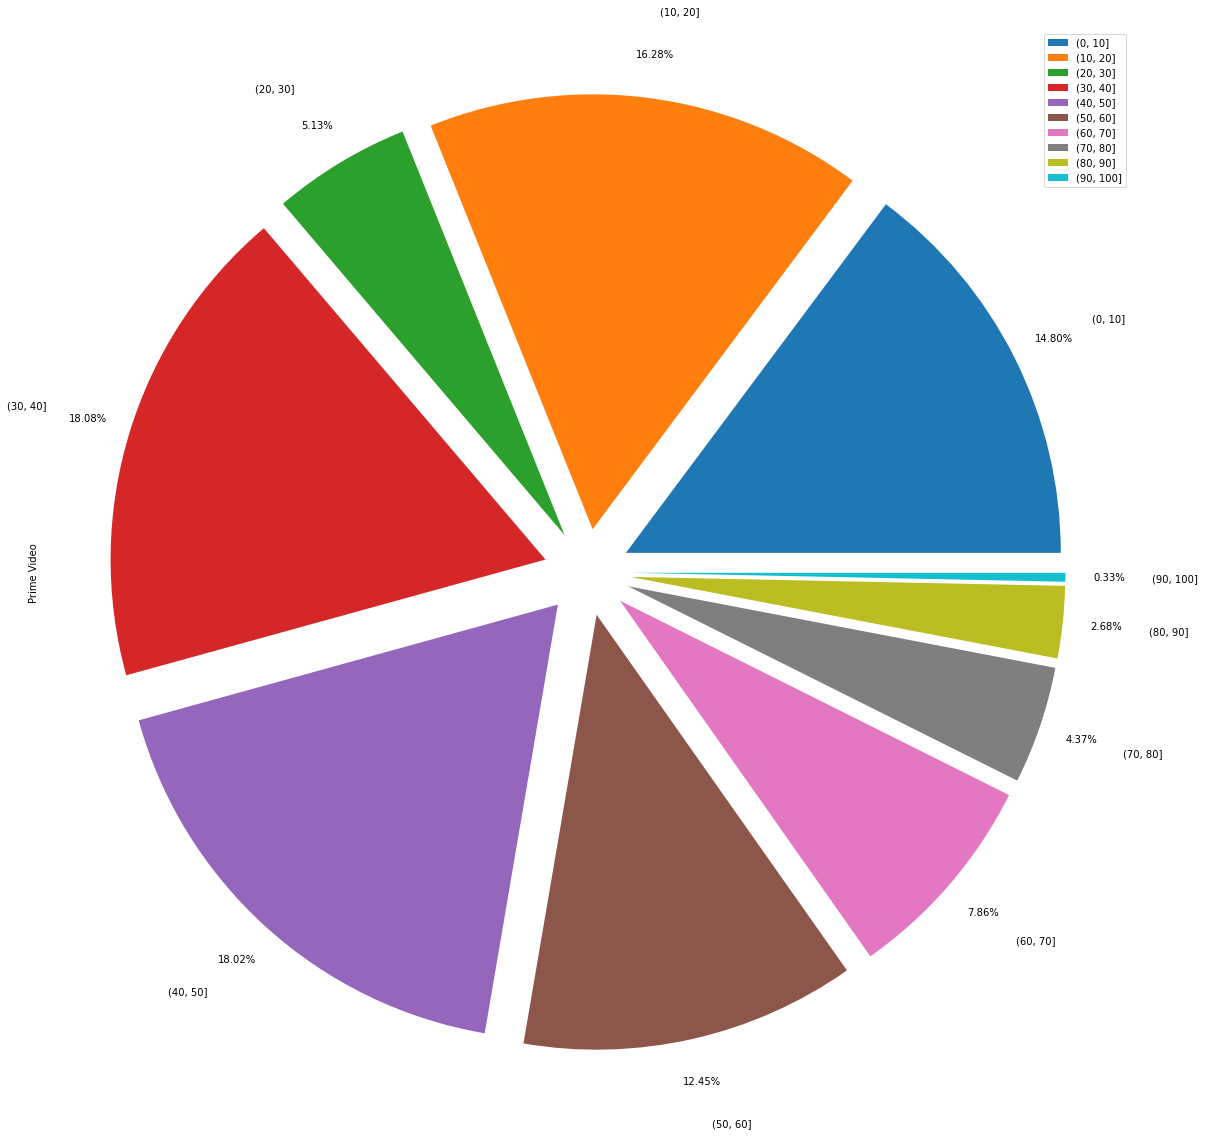

In [16]:
df_data["Rotten Tomatoes"] = df_data["Rotten Tomatoes"].astype(float)
df_data["Prime Video"] = df_data["Prime Video"].astype(int)
df_pv = df_data[["Rotten Tomatoes", "Prime Video"]]
df_pv = df_pv.groupby(pd.cut(df_pv["Rotten Tomatoes"], np.arange(0, 101, 10))).sum()

plot = df_pv.plot.pie(y = "Prime Video", figsize = (20,20), autopct='%1.2f%%', pctdistance=1.1, labeldistance=1.2, explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))



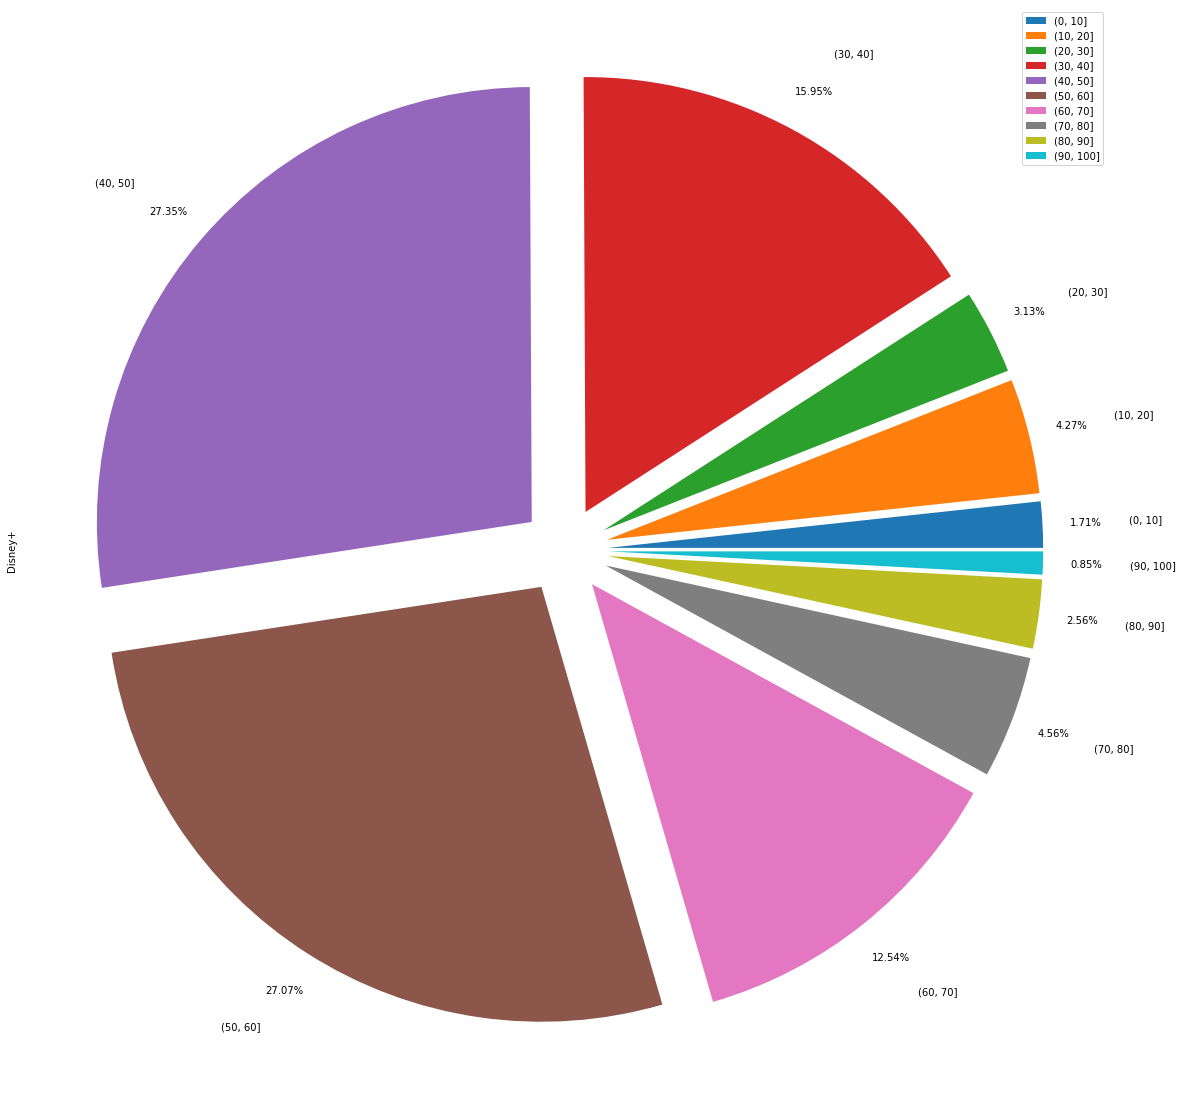

In [17]:
df_data["Rotten Tomatoes"] = df_data["Rotten Tomatoes"].astype(float)
df_data["Disney+"] = df_data["Disney+"].astype(int)
df_disney = df_data[["Rotten Tomatoes", "Disney+"]]
df_disney = df_disney.groupby(pd.cut(df_disney["Rotten Tomatoes"], np.arange(0, 101, 10))).sum()

plot = df_disney.plot.pie(y = "Disney+", figsize = (20,20), autopct='%1.2f%%', pctdistance=1.1, labeldistance=1.2, explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))


